### Resoluçao do problema: https://www.codenation.com.br/journey/data-science/challenge/enem-4.html

## Definição: 
Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e IN_TREINEIRO.


## Importação das bibliotecas

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

## leitura do arquivo de treino

In [30]:
train = pd.read_csv('train.csv')

In [31]:
columns=['NU_IDADE',
    'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_ST_CONCLUSAO','IN_TREINEIRO'
]

In [32]:
train = train[columns]

## Visualização dos dados após a filtragem

In [33]:
train.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_ST_CONCLUSAO,IN_TREINEIRO
0,24,436.3,495.4,581.2,520.0,1,0
1,17,474.5,544.1,599.0,580.0,2,0
2,21,NaN,NaN,NaN,NaN,3,0
3,25,NaN,NaN,NaN,NaN,1,0
4,28,NaN,NaN,NaN,NaN,1,0


## Tratamento de dados faltantes

In [34]:
print(train.isnull().sum())

NU_IDADE              0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
TP_ST_CONCLUSAO       0
IN_TREINEIRO          0
dtype: int64


In [35]:
train.fillna(0, inplace=True)

In [36]:
print(train.isnull().sum())

NU_IDADE           0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
TP_ST_CONCLUSAO    0
IN_TREINEIRO       0
dtype: int64


## Separação dos dados de treino entre treino e teste

In [37]:
X = train.values[:, :-1]
y = train.values[:, -1]

In [38]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
    test_size=0.3, random_state=1)

## Treinamento e avaliçao dos modelos

## DecisionTree

In [39]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
resposta_dt = dt.predict(X_test)
print(metrics.classification_report(y_test, resposta_dt))
accuracy_dt = metrics.accuracy_score(y_test, resposta_dt)
print('accuracy: ')
print(accuracy_dt)

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      3588
        1.0       0.99      0.98      0.99       531

avg / total       1.00      1.00      1.00      4119

accuracy: 
0.9966011167759165


## LogisticRegression

In [40]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
resposta_lr = lr.predict(X_test)
print(metrics.classification_report(y_test, resposta_lr))
accuracy_lr = metrics.accuracy_score(y_test, resposta_lr);
print('accuracy: ')
print(accuracy_lr)

             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99      3588
        1.0       0.94      0.98      0.96       531

avg / total       0.99      0.99      0.99      4119

accuracy: 
0.9895605729546006


## SVC

In [41]:
svc = svm.SVC()
svc.fit(X_train, y_train)
resposta_svc = svc.predict(X_test)
print(metrics.classification_report(y_test, resposta_svc))
accuracy_svc = metrics.accuracy_score(y_test, resposta_svc);
print('accuracy: ')
print(accuracy_svc)

             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94      3588
        1.0       0.97      0.13      0.24       531

avg / total       0.90      0.89      0.85      4119

accuracy: 
0.887836853605244


## KNN

In [42]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
resposta_knn = knn.predict(X_test)
print(metrics.classification_report(y_test, resposta_knn))
accuracy_knn = metrics.accuracy_score(y_test, resposta_knn);
print('accuracy: ')
print(accuracy_knn)

             precision    recall  f1-score   support

        0.0       0.89      0.98      0.93      3588
        1.0       0.57      0.17      0.26       531

avg / total       0.85      0.88      0.85      4119

accuracy: 
0.8766690944403982


## GradientBoostingClassifier

In [43]:
modeloGBC = GradientBoostingClassifier()
modeloGBC.fit(X_train, y_train)
resposta_gbc = modeloGBC.predict(X_test)
print(metrics.classification_report(y_test, resposta_gbc))
accuracy_gbc = metrics.accuracy_score(y_test, resposta_gbc);
print('accuracy: ')
print(accuracy_gbc)

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      3588
        1.0       1.00      0.98      0.99       531

avg / total       1.00      1.00      1.00      4119

accuracy: 
0.9975722262685117


## Comparação entre modelos

In [44]:
comparacao = pd.DataFrame(data=[[
    accuracy_dt, accuracy_lr, accuracy_svc, accuracy_knn, accuracy_gbc]],
    columns=['DT', 'LR', 'SVC', 'KNN', 'GBC'])

In [45]:
comparacao.head()

,DT,LR,SVC,KNN,GBC
0,0.996601,0.989561,0.887837,0.876669,0.997572


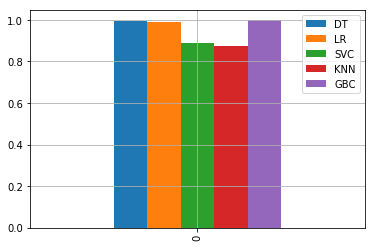

In [46]:
comparacao.plot(kind='bar', grid=True);

In [47]:
comparacao = comparacao.transpose()

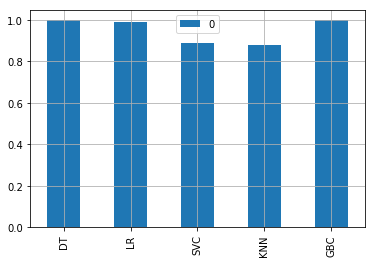

In [48]:
comparacao.plot(kind='bar', grid=True);

## Criação do modelo escolhido

In [49]:
test = pd.read_csv('test.csv')

In [50]:
columns=['NU_IDADE','NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_ST_CONCLUSAO']

In [51]:
test = test[columns]

## Tratamento de dados faltantes

In [52]:
print(test.isnull().sum())

NU_IDADE              0
NU_NOTA_CN         1112
NU_NOTA_CH         1112
NU_NOTA_LC         1170
NU_NOTA_REDACAO    1170
TP_ST_CONCLUSAO       0
dtype: int64


In [53]:
test = test.fillna(0)

In [54]:
print(test.isnull().sum())

NU_IDADE           0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
TP_ST_CONCLUSAO    0
dtype: int64


## realizando a predição com o modelo

In [55]:
definitivo = GradientBoostingClassifier()
definitivo.fit(X, y)
resposta_definitivo = definitivo.predict(test.values)

## Criação do arquivo csv

In [56]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = pd.read_csv('test.csv')['NU_INSCRICAO']
answer['IN_TREINEIRO'] = resposta_definitivo

In [57]:
answer.shape

(4570, 2)

In [58]:
answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0.0
1,177f281c68fa032aedbd842a745da68490926cd2,0.0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1.0
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0.0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0.0


In [59]:
answer.to_csv('answer.csv', index=False)

## Após submeter o arquivo 'answer.csv' para a codenation, foi obtida a pontuação de 95%